<!--# STAT 207: Data Science Exploration-->
## Linear Regression Modeling

Until now, we have investigated the distributions of single variables and their summary statistics, and the dependence of the distribution of a single variable on a second grouping variable, e.g., two-sample tests and confidence intervals for differences between means or proportions.

Regression analysis is a general approach that  enables study of the dependence of one variable, the response variable, on other variables, called explanatory or exogenous variables. It is crucial that the explanatory variables are things that can be measured along with the target reponse variable. Then we can use the data to build a model for predicting the response from the exogenous variables, and to determine which of the explanatory variables has a significant relationship with the response.

We'll consider:

+ The general modeling framework with response and multiple explanatory variables


+ Least squares criterion - minimizing sum of square residuals


+ Model Coefficient estimates, standard errors and inferences


+ Implementation via the python library statsmodels


+ Residual plots to assess whether the model is adequate


+ Transformation of variables to achieve linearity


+ Encoding categorical explanatory variables in the model




**Primary modeling package: statsmodels**

To install statsmodels from the anaconda command line:

    conda install -c conda-forge statsmodels

### General framework for linear models

Suppose we have a data frame of $n$ observations on variables $X_1, X_2, \ldots, X_p, Y$. The variable $Y$ is the **response variable** of interest, often called an **endogenous** variable. The variables $X_1, X_2, \ldots, X_p$ are possible **explanatory variables**, also called **exogenenous** variables. It might be helpful to think of the random variables as the variable names and the observed values as the entries in a data frame structure as follows:


| $X_1$ | $X_2$ | $\cdots$ | $X_p$ | $Y$ |
| --- | --- | --- | --- | --- |
| $x_{11}$ | $x_{12}$ | $\cdots$ | $x_{1p}$ | $y_1$ |
| $x_{21}$ | $x_{22}$ | $\cdots$ | $x_{2p}$ | $y_2$ |
| $\vdots$ | $\vdots$ | $\cdots$ | $\vdots$ | $\vdots$ |
| $x_{n1}$ | $x_{n2}$ | $\cdots$ | $x_{np}$ | $y_n$ |


A basic way to model the dependence of $Y$ on the other variables is a linear model of the form:

$$
E(Y) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p
$$

A common starting assumption is that the standard deviation of $Y$ is constant, say, equal to $\sigma$, and that all of the responses $Y_1, Y_2, \ldots, Y_n$ are independent. Then another way to express the model is in the form

$$
Y_i = \beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \cdots + \beta_p X_{ip} + e_i, \quad i=1,2,\ldots,n
$$

where the 'noise' terms $e_1, e_2, \ldots, e_n$ are a random sample from a distribution with mean zero and standard deviation $\sigma$.

The regression coefficients $\beta_0, \beta_1, \ldots, \beta_p$ are population parameters that we estimate from the data. The errors or noise terms $e_1, e_2, \ldots, e_n$ are not observable. We estimate their standard deviation from the observed data $x_{i1}, x_{i2}, \ldots, x_{ip}, y_{i}$, $i=1,2,\ldots,n$.



**Goals:** 

+ Develop and estimate a model for explaining the variation in a response variable $Y$ in terms of other observable explanatory variables. 

+ Check the model for consistencey with the modeling assumptions

+ Determine which of the explanatory variables are statistically significant

+ Use the model to predict future endogenous observations $Y$ from observable exogenous variables $X_1, \ldots X_p$.


**Ordinary Least Squares (OLS)**

If the model assumptions are correct, then statistically efficient estimates of the regression coefficients are provide by the method of ordinay least squares (OLS):

+ Define the residual sum of squares:

$$
RSS(\beta_0, \beta_1, \ldots, \beta_p) = \sum_{i=1}^n (y_{i} - \mu_i)^2
$$

where $\mu_i$ depends on the coefficients as follows:

$$
\mu_i = \beta_0 + \beta_1 x_{i1}  + \beta_2 x_{i2} + \cdots + \beta_p x_{ip}, \quad i=1,2,\ldots, n.
$$

+ Solve for the minimizing values: $\hat{\beta_0}, \hat{\beta_1}, \ldots, \hat{\beta_p}$. 

This has an explicit solution using linear algebra. We will derive the formulas for the special case of one exogenous variable (simple linear regression). 

Statistical modeling packages allow us to fit the model easily by specifying which variables to include. These packages routinely provide both estimates and standard errors for the estimates. 



**Fitted values and proportion of variance explained:**

Given the coefficient estimates the fitted values are:

$$
\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{i1} + \hat{\beta}_2 x_{i2} + \cdots + \hat{\beta}_p x_{ip}, \quad i=1,2,\ldots, n.
$$

These are the best fitting linear combinations of the explanatory variables. They mimimize the sum of squared residuals with respect to the coefficients.

The mimimized **residual sum of squares** have the form

$$
RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2.
$$

For comparison, if we ignored all the exogenous variables, the **total variation** in $y$ is

$$
RSS_0 = \sum_{i=1}^n (y_i - \bar{y})^2 = (n-1) S_y^2.
$$

Therefore, one measure of the impact of the explanatory variables is the **proportion of variance explained**,

$$
R^2 = {RSS_0 - RSS \over RSS_0} = 1 - {RSS \over RSS_0}.
$$

Regression packages often report this statistic as R-square.


**Coefficient standard errors, tests and confidence intervals**

+ If the data are Gaussian (i.e. they follow a normal distribution), then the ratios of coefficient estimates to their standard errors are t test statistics for the null hypothesis that the coefficent is zero. For these tests the degrees of freedom = n - p - 1 (sample size - number of estimated regression coefficients).


+ If the data are not Gaussian, the coefficient t statistics provide large sample valid tests.


+ $100(1-\alpha)\%$ confidence intervals for the coefficients $\beta_j$ have the form:

$$
(\hat{\beta}_j - t_q * se(\hat{\beta}_j), \quad \hat{\beta}_j + t_q * se(\hat{\beta}_j))
$$

where $t_q$ can be computed as 

        t.ppf(1-alpha/2, df=n-p-1)
        
Closely related are the coefficient t statistics:

$$
t_j = {\hat{\beta}_j \over se(\hat{\beta}_j)}, \quad j=0, 1, \ldots, p.
$$

These are for testing

$$
H_0: \beta_j = 0\quad \mbox{versus} \quad H_A: \beta_j \ne 0
$$

Under $H_0$ and Gaussian error assumptions $t_j$ should be compared the t distribution with $n-p-1$ degrees of freedom. Thus we compute the p-value for the test as

$$
\mbox{p_value}_j = P(\vert T \vert \gt \vert t_j \vert) = 2 * P(T \lt -\vert t_j \vert) 
$$

where $T \sim t(n-p-1)$. If the data are non-gaussian this still provides a large sample valid inference. 

The key assumptions in order for the standard errors to be correct are:

+ The model is unbiased, i.e. the noise terms have mean zero

+ The noise terms are uncorrelated and have equal standard deviations

If the first assumption is violated it means that there are important variables or transformations missing from the model.

If the second assumption is violated a generalized least squares approach might be necessary, or a more general variance formula may be used that does not require a correctly specified covariance structure, at the cost of addition computational and modeling complexity.

### Simple linear regression: one exogenous variable

In a linear model with just one explanatory variable has the form

$$
Y_i = \beta_0 + \beta_1 X_i + e_i, \quad i=1, 2,\ldots, n
$$

where unbiasedness of the model implies $E(e_i)=0$. The OLS is an optimal estimator if these errors are uncorrelated and have constant standard deviation $SD(e_i)=\sigma$. 

For this **single predictor model** the OLS regression coefficient estimates have simple formulas:

$$
\text{Slope: } \hat{\beta}_1 = {\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y}) 
\over \sum_{i=1}^n (X_i - \bar{X})^2 }
= r_{xy} {S_y \over S_x} \qquad
\text{Intercept: } \hat{\beta}_0 = \bar{Y} - \hat{\beta_1} \bar{X}
$$

where $r_{xy}$ is the sample correlation coefficient between $X$ and $Y$, and $S_x$ and $S_y$ are the sample standard deviations of the $X$ and $Y$ data respectively.

Notice that the factor $r_{xy}$ measures the linear association between $Y$ and $X$. The ratio of standard deviations converts predictor ($X$) units to response ($Y$) units if $X$ and $Y$ are on different scales.

For this model it turns out that $R^2 = r_{xy}^2$, so the squared sample correlation is the proportion of variance explained by the model.

### Example: Mother/Daughter heights

#### Data exploration and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
df = pd.read_csv('../data/heights.txt', sep=' ')
df.head()

,Mheight,Dheight
0,59.7,55.1
1,58.2,56.5
2,60.6,56.0
3,60.7,56.8
4,61.8,56.0


In [3]:
df.shape

(1375, 2)

In [4]:
df.describe()

,Mheight,Dheight
count,1375.000000,1375.000000
mean,62.452800,63.751055
std,2.355103,2.600053
min,55.400000,55.100000
25%,60.800000,62.000000
50%,62.400000,63.600000
75%,63.900000,65.600000
max,70.800000,73.100000


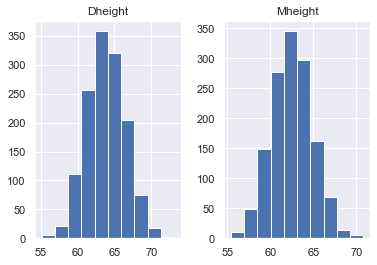

In [5]:
df.hist()
plt.show()

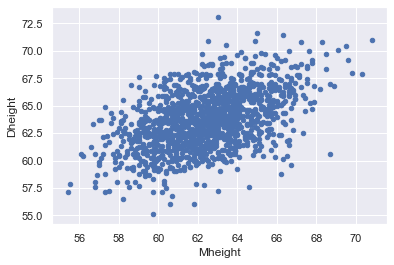

In [6]:
df.plot.scatter(x='Mheight', y='Dheight', c='b')
plt.show()

#### Correlation between response and explanatory variables

In the OLS we saw that the slope of the least squares regression line is related to teh correlation between the response and the explanatory variable. Using pandas, we can compute the correlation as follows, extracting the desired pariwise correlation from the correlation matrix.

In [7]:
df.corr()

,Mheight,Dheight
Mheight,1.000000,0.490709
Dheight,0.490709,1.000000


In [8]:
rxy = df.corr().iloc[0,1]
rxy

0.49070936145753397

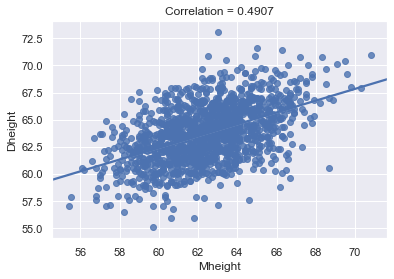

In [9]:
sns.regplot(x='Mheight', y='Dheight', data=df, ci=False)
plt.title('Correlation = '+str(round(rxy, 4)))
plt.show()

#### Fitting a regression model and summarizing it

We import the formula api from the statsmodels library and then fit a simple linear regression model.

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

This step fits the model and creates an object containing the results.

In [11]:
results = smf.ols('Dheight ~ Mheight', data=df).fit()

Using the .summary() function, we can display an organized summary of the fitted model. The summary includes various quantitiative features of the model fit as well as a summary table for the model coefficient estimates, standard errors and coefficient t tests.

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Dheight   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     435.5
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           3.22e-84
Time:                        14:01:16   Log-Likelihood:                -3075.0
No. Observations:                1375   AIC:                             6154.
Df Residuals:                    1373   BIC:                             6164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9174      1.622     18.439      0.000      26.735      33.100
Mheight        0.5417      0.026     20.868      0.000       0.491       0.593
==============================================================================
Omnibus:                        1.412   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.353
Skew:                           0.002   Prob(JB):                        0.508
Kurtosis:                       3.154   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Extracting individual pieces information from the results

If we want individual tables from the results summary we can access them as follows:

In [13]:
results.summary().tables[0]

Dep. Variable:,Dheight,R-squared:,0.241
Model:,OLS,Adj. R-squared:,0.240
Method:,Least Squares,F-statistic:,435.5
Date:,"Mon, 23 Mar 2020",Prob (F-statistic):,3.22e-84
Time:,14:01:16,Log-Likelihood:,-3075.0
No. Observations:,1375,AIC:,6154.
Df Residuals:,1373,BIC:,6164.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [14]:
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,29.9174,1.622,18.439,0.000,26.735,33.100
Mheight,0.5417,0.026,20.868,0.000,0.491,0.593


Uncommenting the following command gives a listing of all the the individual pieces of information we could extract from the ols results object:

In [15]:
# dir(results)

As an example, we can extract the value for $R^2$, the proportion of variance explained, as follows.

In [16]:
results.rsquared

0.24079567742206154

### Using the model for prediction 

Given mother's height the model provides a prediction for her daughter's height. One way to compute this to extract the coefficient estimates and use them to compute the new prediction. The can be accessed directly from the results object as **params**.

In [17]:
results.params # estimated regression coefficients

Intercept    29.917437
Mheight       0.541747
dtype: float64

What is the daughter's predicted height if her mother's height is 68 inches? Looking at the output we would compute:

$$
\hat{y}_{new} = 29.9174 + 0.5417 * 68 = 66.75
$$

In [18]:
# manual calculation:
29.9174 + 0.5417*68

66.753

In [19]:
# calculation by extracting parameter estimates:
sum(results.params * [1, 68])

66.75623356729784

**Easier automatic method: OLS predict function**

Statmodels has a method for performing this prediction and enhancing it with additionla information. Here it is in action. The argument "exog=" requires a dictionary list of the exogenous (explanatory) variables and their values.

In [20]:
results.predict(exog=dict(Mheight=68))

0    66.756234
dtype: float64

Using this method we can easily predict multiple values at a time:

In [21]:
results.predict(exog=dict(Mheight=[60, 68, 70]))

0    62.422257
1    66.756234
2    67.839728
dtype: float64

### Plotting residuals versus fitted values to check model fit

In the analysis of the heights data, the directory of component methods for the OLS results includes 'resid' and 'fittedvalues' among many others. For any regression model, 'fittedvalues' is the array of closest fitting values for the $n$ responses, subject to the constraints imposed by the model. The $i$th fitted value is

$$
\mbox{Fitted values:}\qquad \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{i1} + \cdots + \hat{\beta}_p x_{ip}, \quad i=1, 2, \ldots, n
$$

The deviations of the observations of the opbservations from their fitted values can provide information about model fit. We can check this using the residuals available in 'resid'. The $i$th residual is given by

$$
\mbox{Residuals:}\qquad \hat{e}_i = y_i - \hat{y}_i, \quad i = 1, 2, \ldots, n.
$$

**Fact:** if the model includes an intercept, then the mean (and sum) of the residuals is always 0, and the residuals and fitted values are uncorrelated (no linear association).

We can check for nonlinear patterns in the residuals as a way to detect violations of assumptions such as linearity of the regression or nonconstant standard deviations.


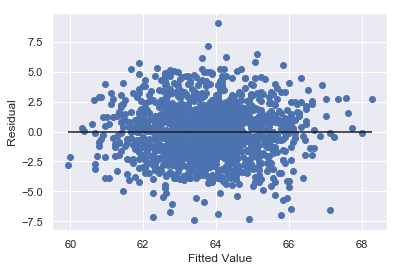

In [22]:
plt.scatter(results.fittedvalues, results.resid)
plt.hlines(y=0, xmin=np.min(results.fittedvalues), xmax=np.max(results.fittedvalues))
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

The pattern here looks ideal, no systematic curvature, just random variation.

### Another interpretation of R-squared

In the case of one explanatory variable $X$, $R^2$ equals the square of the sample correlation between $X$ and $Y$, the response. If there are multiple explanatory explanatory vairables in the model this no longer holds true. However, if the model includes an intercept, then it is always the case that $R^2$ is the square of the sample correlation between $Y$ and the **fitted values**, as demonstrated numerically below. 

**Note:** an alternative to the pandas corelation matrix is the numpy univariate corelation between two variables. We demonstrate that here.

In [23]:
np.corrcoef(df['Dheight'], results.fittedvalues)[0,1]**2

0.24079567742206182

In [24]:
results.rsquared

0.24079567742206154

### Extending the applicability of the linear model with transformations

#### Example: Interspecies study of brain weight / body weight

In [25]:
brain = pd.read_csv('../data/brain.csv') 
brain.head(10)

,species,bodykg,braing
0,African elephant,6654.000,5712.0
1,African giant pouched rat,1.000,6.6
2,Arctic Fox,3.385,44.5
3,Arctic ground squirrel,0.920,5.7
4,Asian elephant,2547.000,4603.0
5,Baboon,10.550,179.5
6,Big brown bat,0.023,0.3
7,Brazilian tapir,160.000,169.0
8,Cat,3.300,25.6
9,Chimpanzee,52.160,440.0


In [26]:
brain.describe()

,bodykg,braing
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


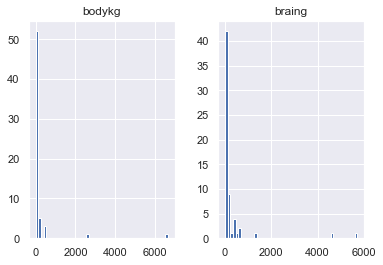

In [27]:
brain.hist(bins=50)
plt.show()

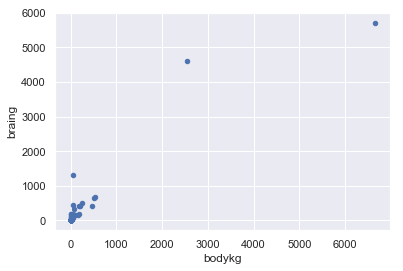

In [28]:
brain.plot.scatter(x='bodykg', y='braing', c='b')
plt.show()

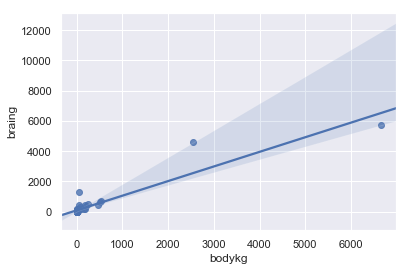

In [29]:
sns.regplot(x='bodykg', y='braing', data=brain)
plt.show()

Fitting a linear model to the raw brain and body mass data is problematic because the regression line is determined by just a few observations and is not representative of all the data. 

#### Residual plot

Here is the residual versus fitted value plot for the OLS regression fit using Seaborn's regplot.

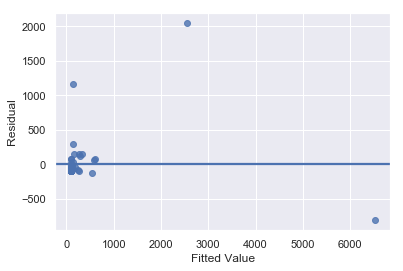

In [30]:
brain_result0 = smf.ols('braing ~ bodykg', data=brain).fit()
sns.regplot(x=brain_result0.fittedvalues, y=brain_result0.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**Log transformation to address extreme skewness**

Let's try logarithmic transformations of the data to address the extreme skewness and orders of magnitude range in values.

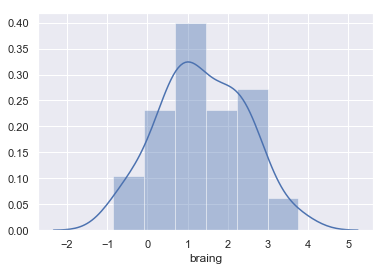

In [31]:
sns.distplot(np.log10(brain['braing']))
plt.show()

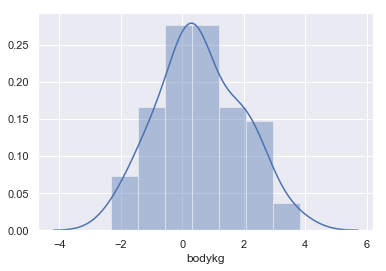

In [32]:
sns.distplot(np.log10(brain['bodykg']))
plt.show()

Looks promising. We add the log transformed variables to the data for further analysis.

In [33]:
brain['log10bodykg'] = np.log10(brain['bodykg'])
brain['log10braing'] = np.log10(brain['braing'])
brain.head(10)

,species,bodykg,braing,log10bodykg,log10braing
0,African elephant,6654.000,5712.0,3.823083,3.756788
1,African giant pouched rat,1.000,6.6,0.000000,0.819544
2,Arctic Fox,3.385,44.5,0.529559,1.648360
3,Arctic ground squirrel,0.920,5.7,-0.036212,0.755875
4,Asian elephant,2547.000,4603.0,3.406029,3.663041
5,Baboon,10.550,179.5,1.023252,2.254064
6,Big brown bat,0.023,0.3,-1.638272,-0.522879
7,Brazilian tapir,160.000,169.0,2.204120,2.227887
8,Cat,3.300,25.6,0.518514,1.408240
9,Chimpanzee,52.160,440.0,1.717338,2.643453


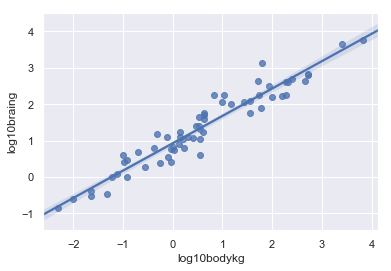

In [34]:
sns.regplot(x='log10bodykg', y='log10braing', data=brain)
plt.show()

On the log-log scale the interspecies data appear much more amenable to linear modeling. The least squares line is comparably close to all of the data, not just a few observations, so the line is much more representative of the interspecies relationship between brain and body mass.

#### Residual plot

Let's fit the model and check the residual plot.

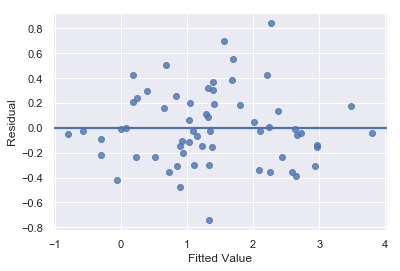

In [35]:
brain_results = smf.ols('log10braing ~ log10bodykg', data=brain).fit()
sns.regplot(x=brain_results.fittedvalues, y=brain_results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

#### Summary for log-log model

Here is the OLS fitted model summary for further interpretation:

In [36]:
brain_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log10braing   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     697.4
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           9.84e-35
Time:                        14:01:19   Log-Likelihood:                -12.626
No. Observations:                  62   AIC:                             29.25
Df Residuals:                      60   BIC:                             33.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.9271      0.042     22.227      0.000       0.844       1.011
log10bodykg     0.7517      0.028     26.409      0.000       0.695       0.809
==============================================================================
Omnibus:                        2.698   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.933
Skew:                           0.405   Prob(JB):                        0.380
Kurtosis:                       3.301   Cond. No.                         1.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Predicting the brain mass based on body mass

Suppose we want to predict the brain mass for a species whose average body mass is 500 kg. How can we use this log-log model to make the prediction?

First, we convert body mass to log scale:

In [37]:
bodymass = 500
xnew = np.log10(bodymass)
xnew

2.6989700043360187

Next, use the fitted model for prediction.

In [38]:
ypred = brain_results.predict(exog=dict(log10bodykg=xnew))[0]
ypred

2.955904736946554

Finally, convert the log10 brain mass back to the original scale.

In [39]:
print('body mass (kg): '+str(bodymass))
print('predicted brain mass (g): '+str(10**ypred))

body mass (kg): 500
predicted brain mass (g): 903.451278785396


### Multiple linear regression: more than one exogenous variable

Next we consider fitting a model with multiple exogenous variables:

$$
Y_i = \beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \cdots + \beta_p X_{ip} + e_i, \quad i=1, 2, \ldots, n.
$$

The model is unbiased, and OLS is optimal if the errors $e_i$ have mean zero, are uncorreated, and have constant standard deviation $\sigma$ (unknown value).


With multiple explanatory variables in the model, the simple linear regression formulas no longer apply. The coefficient estimates can be easily expressed using matrix algebra, but for our purposes it suffices to observe that the
coefficient estimates
$\hat{\beta}_0$, $\hat{\beta}_1$, $\ldots$, $\hat{\beta}_p$ 
are defined by the **least squares equations**:

\begin{align*}
&\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_{i1} + \hat{\beta}_2 X_{i2} + \cdots + \hat{\beta}_p X_{ip}\\
&\sum_{i=1}^n (Y_i - \hat{Y}_i) = 0\\
&\sum_{i=1}^n (Y_i - \hat{Y}_i) X_{i1} = 0\\
&\sum_{i=1}^n (Y_i - \hat{Y}_i) X_{i2} = 0\\
& \qquad \vdots\\
&\sum_{i=1}^n (Y_i - \hat{Y}_i) X_{ip} = 0\\
\end{align*}

Solving a system of equations like this is straightforward using matrix operations. This is a topic covered in courses on linear algebra. Here we note that the numerical solution is built into standard regression functions such as the statsmodels .ols function. We'll see this in action below.

#### Consequences for properties of the residuals

From the least squares equations we can see that the residuals sum to zero (have mean zero), and they are uncorrelated with each of the predictor varirables. It also follows that the residuals are uncorrelated with each of the $X$ variables, and also uncorrelated with the predictor values, i.e. $\hat{e}_i = Y_i - \hat{Y}_i$ and $\hat{Y}_i$ have sample correlation coeffiicent equal to zero.

### Example: Duncan's occupational prestige data

#### Data exploration and visualization

Data on prestige and other features of 45 occupations in the U.S. in 1950. This is available from the statmodels package.

In [40]:
prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data
prestige.head(10)

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90
minister,prof,21,84,87
professor,prof,64,93,93
dentist,prof,80,100,90
reporter,wc,67,87,52
engineer,prof,72,86,88


In [41]:
prestige.describe()

,income,education,prestige
count,45.000000,45.000000,45.000000
mean,41.866667,52.555556,47.688889
std,24.435072,29.760831,31.510332
min,7.000000,7.000000,3.000000
25%,21.000000,26.000000,16.000000
50%,42.000000,45.000000,41.000000
75%,64.000000,84.000000,81.000000
max,81.000000,100.000000,97.000000


In [42]:
prestige.corr()

,income,education,prestige
income,1.000000,0.724512,0.837801
education,0.724512,1.000000,0.851916
prestige,0.837801,0.851916,1.000000


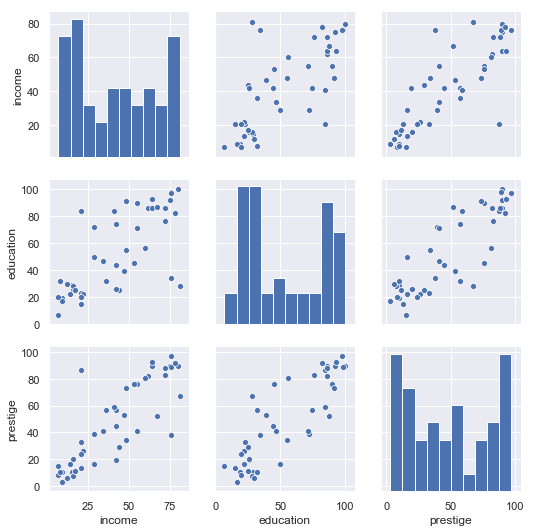

In [43]:
sns.pairplot(prestige)
plt.show()

#### Fitting a multiple linear model, checking it and summarizing it

In [44]:
prestige_res = smf.ols('prestige ~ education + income', data=prestige).fit()

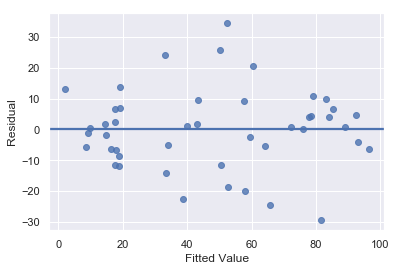

In [45]:
# Check the residual plot
sns.regplot(x=prestige_res.fittedvalues, y=prestige_res.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

In [46]:
# display the model summary
prestige_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           8.65e-17
Time:                        14:01:21   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.163     -14.686       2.556
education      0.5458      0.098      5.555      0.000       0.348       0.744
income         0.5987      0.120      5.003      0.000       0.357       0.840
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
print(prestige_res.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           8.65e-17
Time:                        14:01:21   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.1

#### Remark: Confirmation that R-squared is squared correlation between y and yhat

This is just to demonstrate that with more than one exogenous variable R-square is the squared correlate between the response adn teh fitted values.

In [48]:
prestige_res.rsquared

0.8281734172543814

In [49]:
np.corrcoef(prestige.prestige, prestige_res.fittedvalues)[0,1]**2

0.8281734172543818

#### Model interpretation

According to the model we see that both education and income have statistically significent positive associations with the prestige score. Caution is required in interpreting these results, as we cannot conclude based on this study that higher income and education level "caused" higher prestige. 

#### Model predictions

Let's estimate the prestige score for a profession with education score = 25 and income = 30. Based on the fitted model we would calculate:

$$
\hat{y}_{new} = -6.0647 + 0.5458 * 25 + 0.5987 * 30 = 25.5413
$$

In [50]:
# calculation:
-6.0647 + 0.5458 * 25 + 0.5987 * 30

25.5413

In [51]:
# calculation using predict function:
prestige_res.predict(exog=dict(education=25, income=30))

0    25.543169
dtype: float64

**Comment:** These types of predictions are most reliable when the exogenous variables are within the range of the range of the original study. Trying to predict based on extreme values of the exogenous variables is called **extrapolation**. Extrapolation is risky because we have no emprical evidence that the model holds outside of the range of the data in the original study.

### Categorical exogenous variables

In the examples so far, all of the variables have been numerical. What if we wish to include categorical explanatory variables? We saw in earlier sections on two-sample methods that treatment variables, gender and other categories might influence the response. Can we include such variables in the general linear regression model? The general technique is to encode the categories using 0/1 indicator variables for the different categories.

**Example: lead exposure data**

In [52]:
lead = pd.read_csv('../data/lead.csv')
lead.head()

,id,age,sex,status,verbiq,perfiq,fulliq,iqtype,totyrs,hyperact,tapping,group
0,101,11.083333,M,77,61,85,70,WISC,11,NaN,72.0,lead < 40
1,102,9.416667,M,77,82,90,85,WISC,6,0.0,61.0,lead < 40
2,103,11.083333,M,30,70,107,86,WISC,5,NaN,49.0,lead < 40
3,104,6.916667,M,77,72,85,76,WISC,5,2.0,48.0,lead < 40
4,105,11.250000,M,62,72,100,84,WISC,11,NaN,51.0,lead < 40


Let's try regressing 'fulliq' on 'age' and 'sex'. What will happen given that 'sex' is 'M' or 'F'?

In [53]:
lead_res = smf.ols('fulliq ~ age + sex', data=lead).fit()
lead_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 fulliq   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                   0.05274
Date:                Mon, 23 Mar 2020   Prob (F-statistic):              0.949
Time:                        14:01:21   Log-Likelihood:                -506.16
No. Observations:                 124   AIC:                             1018.
Df Residuals:                     121   BIC:                             1027.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     89.7759      4.231     21.218      0.000      81.399      98.152
sex[T.M]       0.5493      2.724      0.202      0.841      -4.843       5.942
age            0.1083      0.377      0.288      0.774      -0.637       0.854
==============================================================================
Omnibus:                        6.104   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                9.277
Skew:                           0.130   Prob(JB):                      0.00967
Kurtosis:                       4.314   Cond. No.                         33.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Clearly, the model explains very little, as $R^2$ is close to zero. However, computationally, it illustrates how categorical variables are handled. 

We see that a variable 'sex[T.M]' was created. What is this? This illustrates a technique for coding categorical variables. The software has defined:

$$
\mbox{sex[T.M]} = \cases{1,& if 'sex'='M'\\ 0,& if 'sex'='F'\\}
$$

Notice how this affects the model. The estimated regression model for females is:

$$
\mbox{fulliq} = 89.7759 + 0.1083 * \mbox{age}
$$

For males, the model becomes

$$
\mbox{fulliq} = 89.7759 + 0.5493 + 0.1083 * \mbox{age} = 90.3252 + 0.1083 * \mbox{age}
$$

Thus there is a parallel shift in the fitted regression line, with a separate intercept for each sex.

Note, however, that the 'sex' coefficient is not statistically significant at all, with a p-value of 0.84. By fitting this two variable regression model we were able to do an age-adjusted test of this effect and found no evidence of a gender effect. 

This encoding of categorical variables can be done explicitly by the user, but it is important to understand what is happening behind the scenes when we leave it to the software to automate the encoding.

In [54]:
# calculation
89.7759+0.5493

90.3252

In this example, we needed only one 0/1 variable to distiguish males and females. Females are the reference category (indicator = 0), so the intercept refers to them.

In general, if we have $k$ categories for some variable, then we will need $k-1$ different 0/1 indicator variables to encode it. One cateogry will be the reference catgefory, with all zeros, and the others will be coded as 1's in some column.

#### Example: encoding a 4 level factor variable.

Suppose a study compares preservative, A, B, C and D, as part of an evaluation of product shelf-life. We need three variables to encode this factor variable. For example, taking 'A' as the reference category we have:

| Preservative | preservative[T.B] | preservative[T.C] | preservative[T.D] |
| --- | --- | --- | --- |
| A | 0 | 0 | 0 |
| B | 1 | 0 | 0 |
| C | 0 | 1 | 0 |
| D | 0 | 0 | 1 |

Thus, the intercept is the baseline value using preservative A, and the model includes increments for each of the pther preservatives compared to A.

---
STAT 207, Douglas Simpson, University of Illinois at Urbana-Champaign